In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [3]:
#loading the image datset from keras
(X_train,y_train), (X_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
#checking the number of datasets in x train
len(X_train)

60000

In [7]:
#checking the number of testing dataset in x test
len(X_test)

10000

In [9]:
#determing the image size of the first X_train data
X_train[0].shape

(28, 28)

In [11]:
#Presenting the array format for the first X_train data
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

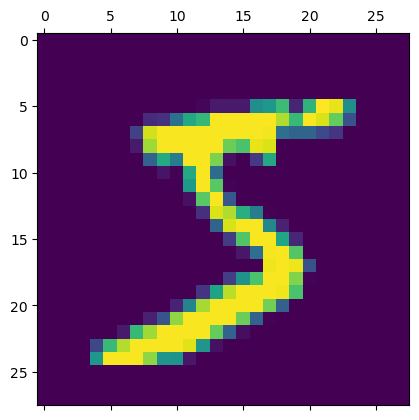

In [13]:
#Visualising the first image of x_train dataset
plt.matshow(X_train[0])

In [15]:
#finding the first ten digits in y_train
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [17]:
#determining the shape of X_train
X_train.shape

(60000, 28, 28)

In [47]:
#scaling the values in X_train and X_test
X_train = X_train / 255
X_test  = X_test / 255 

In [49]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#flatten the training dataset  because i want to convert the 28 by 28 image into a single dimensional array that will have 784 elements

In [51]:
X_train_flattened= X_train.reshape(len(X_train),28*28)

In [53]:
X_train_flattened.shape


(60000, 784)

In [55]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [167]:
#model without a hidden layer
model = keras.Sequential(
    [keras.layers.Dense(10,input_shape=(784,),
        activation='softmax')
    ])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy']
             )


model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - accuracy: 0.8023 - loss: 0.7369
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - accuracy: 0.9134 - loss: 0.3125
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - accuracy: 0.9203 - loss: 0.2846
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - accuracy: 0.9228 - loss: 0.2752
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - accuracy: 0.9250 - loss: 0.2671


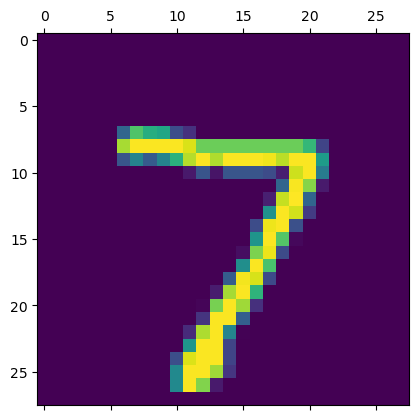

In [59]:
plt.matshow(X_test[0])

In [61]:
y_predicted =model.predict((X_test_flattened))
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step


array([1.9611925e-02, 3.1602792e-07, 8.0273643e-02, 9.6041900e-01,
       2.0674104e-03, 1.4053778e-01, 1.3924470e-06, 9.9984574e-01,
       1.0036117e-01, 6.1197549e-01], dtype=float32)

In [63]:
np.argmax(y_predicted[0])

7

In [65]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [67]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [69]:
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    9,  930,   17,    8,    4,   13,   10,   34,    4],
       [   1,    0,   17,  929,    0,   19,    2,   11,   24,    7],
       [   2,    1,    4,    1,  914,    0,    9,    4,   10,   37],
       [   7,    3,    2,   38,   10,  772,   14,    7,   33,    6],
       [   9,    3,    4,    1,    7,    9,  917,    2,    6,    0],
       [   1,    5,   23,    4,    7,    0,    0,  960,    3,   25],
       [   4,    7,    6,   19,    9,   21,   10,   13,  879,    6],
       [  10,    7,    1,    9,   26,    7,    0,   31,    5,  913]],
      dtype=int32)>

In [169]:
#model with a hidden layer
model = keras.Sequential(
    [keras.layers.Dense(100,input_shape=(784,), activation='relu'),
     keras.layers.Dense(10, activation='softmax')
    ])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy']
             )


model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.8668 - loss: 0.4658
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.9589 - loss: 0.1405
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.9736 - loss: 0.0909
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.9801 - loss: 0.0661
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.9850 - loss: 0.0511


In [171]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - accuracy: 0.9722 - loss: 0.0908


[0.08273694664239883, 0.9753000140190125]

Text(95.72222222222221, 0.5, 'truth')

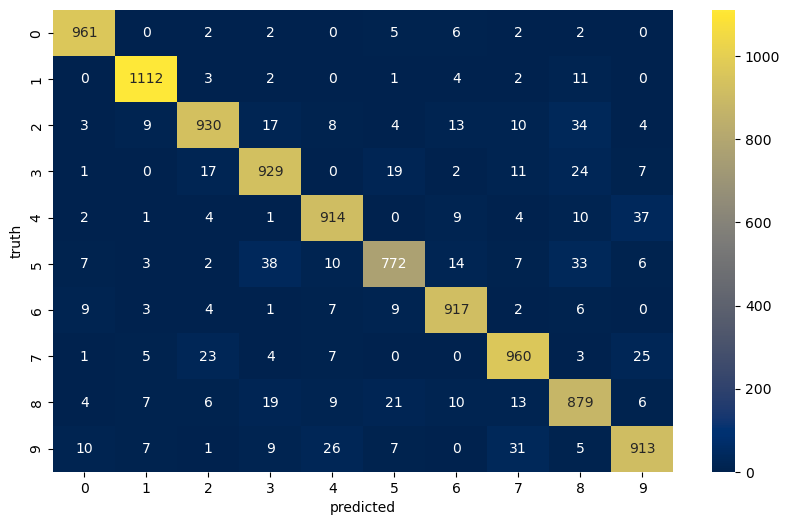

In [117]:
#plotting a confusion matirx
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,fmt='d',cmap='cividis')
plt.xlabel('predicted')
plt.ylabel('truth')

In [157]:
#alternate way of building a model while flattening it using flatten in sequential.
model = keras.Sequential(
    [
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(100, activation='relu'),
     keras.layers.Dense(10, activation='softmax')
    ])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy']
             )


model.fit(X_train,y_train,epochs=7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.8674 - loss: 0.4583
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - accuracy: 0.9620 - loss: 0.1289
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.9748 - loss: 0.0871
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - accuracy: 0.9803 - loss: 0.0649
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - accuracy: 0.9848 - loss: 0.0485
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.9886 - loss: 0.0374
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 384us/step - accuracy: 0.9900 - loss: 0.0327
